# June 25, 2019 Multiclass classification with Keras
* reference: Deep Learning with Python
* name : Jikhan Jeong
* cell to markdown : m
* markdonw to cell : y

In [19]:
from keras.datasets import reuters
import numpy as np
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [20]:
len(train_data)

8982

In [21]:
len(test_data)

2246

In [22]:
type(train_data[0])

list

In [23]:
train_data.shape # 8,982 training examples and 2,246 test examples:

(8982,)

* Decoding newswires back to text

In [24]:
word_index = reuters.get_word_index()
reverse_word_index =dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[0]]) #-3 for padding, starte of seq, unknown

In [25]:
train_labels.shape

(8982,)

In [26]:
train_labels[0] # news categories 0-45

3

* Encoding the data

In [27]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] =1.
    return results

In [28]:
x_train = vectorize_sequences(train_data)

In [69]:
x_train.shape

(8982, 10000)

In [68]:
x_test = vectorize_sequences(test_data)

In [70]:
x_test.shape

(2246, 10000)

In [30]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] =1.
    return results

In [31]:
one_hot_train_labels  = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [33]:
one_hot_train_labels.shape

(8982, 46)

In [34]:
one_hot_test_labels.shape

(2246, 46)

* built-in way for categorial one-hot encoding for multi-class classification

In [35]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# Model Build up

In [1]:
from keras import models
from keras import layers

Using TensorFlow backend.


In [3]:
model = models.Sequential()

In [10]:
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) # input layers 

In [36]:
model.add(layers.Dense(64, activation='relu')) # hidden layers

In [39]:
model.add(layers.Dense(46, activation='softmax')) # output layers 46 categories

* output[i] = probability of different i and sum(all output)=1

In [40]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

* validation set 

In [41]:
x_val = x_train[:1000]
y_val = one_hot_train_labels[:1000]
partial_x_train = x_train[1000:]
partial_y_train = one_hot_train_labels[1000:]

In [44]:
x_val.shape

(1000, 10000)

In [45]:
partial_x_train.shape

(7982, 10000)

In [46]:
7982//512

15

* Fitting the model with training data

In [43]:
history = model.fit(partial_x_train,# 7982
                   partial_y_train,
                   epochs=20,
                   batch_size=512, # 7982//512 = 15
                   validation_data =(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 477us/step - loss: 3.7190 - acc: 0.2771 - val_loss: 3.6250 - val_acc: 0.3540
Epoch 2/20
7982/7982 [==============================] - 2s 239us/step - loss: 3.6005 - acc: 0.3514 - val_loss: 3.5700 - val_acc: 0.3540
Epoch 3/20
7982/7982 [==============================] - 2s 257us/step - loss: 3.5483 - acc: 0.3514 - val_loss: 3.5301 - val_acc: 0.3540
Epoch 4/20
7982/7982 [==============================] - 2s 244us/step - loss: 3.5031 - acc: 0.3514 - val_loss: 3.4904 - val_acc: 0.3540
Epoch 5/20
7982/7982 [==============================] - 2s 252us/step - loss: 3.4617 - acc: 0.3514 - val_loss: 3.4452 - val_acc: 0.3540
Epoch 6/20
7982/7982 [==============================] - 2s 246us/step - loss: 3.4220 - acc: 0.3514 - val_loss: 3.4081 - val_acc: 0.3540
Epoch 7/20
7982/7982 [==============================] - 2s 285us/step - loss: 3.3826 - acc: 0.3514 - val_loss: 3.3708 - val_acc: 0.3540


In [47]:
import matplotlib.pyplot as plt

In [51]:
type(history)

keras.callbacks.History

In [52]:
history_dictionary = history.history

In [53]:
type(history_dictionary)

dict

In [57]:
history_dictionary.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [58]:
loss = history.history['loss']
val_loss= history_dictionary['val_loss']

In [62]:
loss # cross validatry error 

[3.7190086188037963,
 3.600494792185998,
 3.548332841496096,
 3.5031264674780034,
 3.4617308766224784,
 3.422040530178249,
 3.382647022212905,
 3.3447206776054306,
 3.30837747549479,
 3.271210258988562,
 3.236143769252512,
 3.2003762603732047,
 3.165787050640992,
 3.1327651932376335,
 3.098697252244885,
 3.066016034654614,
 3.033935456370328,
 3.002856337017536,
 2.971698086651845,
 2.9414791251387817]

In [59]:
epochs = range(1, len(loss) + 1) # not recognize +1 as python do

In [61]:
len(epochs)

20

* loss graph : training vs validation

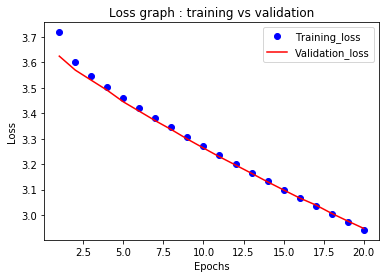

In [63]:
plt.plot(epochs, loss, 'bo', label ='Training_loss')
plt.plot(epochs, val_loss,'red', label ='Validation_loss')
plt.title('Loss graph : training vs validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

* accuracy graph : training vs validation

In [64]:
plt.clf() # clear the graph before

<Figure size 432x288 with 0 Axes>

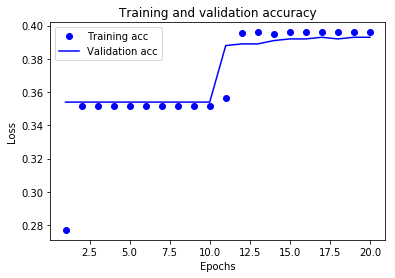

In [65]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [73]:
model.fit(partial_x_train,
        partial_y_train,
        epochs=11,
        batch_size=512,
        validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/11
7982/7982 [==============================] - 2s 246us/step - loss: 2.9117 - acc: 0.3960 - val_loss: 2.9303 - val_acc: 0.3810
Epoch 2/11
7982/7982 [==============================] - 2s 239us/step - loss: 2.8829 - acc: 0.3960 - val_loss: 2.8898 - val_acc: 0.3940
Epoch 3/11
7982/7982 [==============================] - 2s 233us/step - loss: 2.8540 - acc: 0.3961 - val_loss: 2.8625 - val_acc: 0.3940
Epoch 4/11
7982/7982 [==============================] - 2s 233us/step - loss: 2.8260 - acc: 0.3961 - val_loss: 2.8368 - val_acc: 0.3920
Epoch 5/11
7982/7982 [==============================] - 2s 235us/step - loss: 2.7985 - acc: 0.3961 - val_loss: 2.8111 - val_acc: 0.3930
Epoch 6/11
7982/7982 [==============================] - 2s 244us/step - loss: 2.7720 - acc: 0.3960 - val_loss: 2.7836 - val_acc: 0.3940
Epoch 7/11
7982/7982 [==============================] - 2s 234us/step - loss: 2.7450 - acc: 0.3961 - val_loss: 2.7588 - val_acc: 0.3940


* with test set, prediction

In [74]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 1s 243us/step


In [75]:
results # test predition acc = 40%

[2.6774229574500716, 0.39670525383758204]

In [77]:
test_prediction = model.predict(x_test)

In [78]:
test_prediction[0].shape

(46,)

In [85]:
np.sum(test_prediction[0])

0.9999999

In [87]:
np.argmax(test_prediction[0])

3